In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
from skimage import io, transform

In [2]:
FILE_NAME = 'data/img_align_celeba/img_align_celeba/000302.jpg'
WEIGHTS_PATH = 'weights/resnet18.pth'
N_TARGETS = 10
IMG_SIZE = 224

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
net = torchvision.models.resnet18()
net.fc = nn.Linear(in_features=512, out_features=N_TARGETS, bias=True)
net = net.double()
net.load_state_dict(torch.load(WEIGHTS_PATH))
net.to(device)
net = net.eval()

In [5]:
image_init = io.imread(FILE_NAME)
h_init, w_init = image_init.shape[:2]
image = transform.resize(image_init, (IMG_SIZE, IMG_SIZE))
image = image.transpose((2, 0, 1))
image = torch.from_numpy(image.copy()).double()
image = torch.unsqueeze(image, 0)

In [6]:
with torch.no_grad():
    landmarks = net(image).squeeze().numpy().reshape(-1, 2)
landmarks = (landmarks * [w_init / IMG_SIZE, h_init / IMG_SIZE]).astype(int)

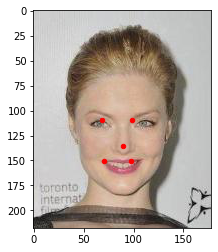

In [7]:
plt.imshow(image_init)
plt.scatter(landmarks[:, 0], landmarks[:,1], s=20, c='r')